# Tasks

## Task 1: Source the Data Set

Import the Iris data set from the sklearn.datasets module.
Explain, in your own words, what the load_iris() function returns.

### Libraries

In [1]:
# First, import necessary libraries for importing data and whatever analysis follows
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn import datasets
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder as le
from sklearn.linear_model import LinearRegression
import seaborn as sns
import statistics

According to the scikit-learn website, scikit-learn comes with a few small standard datasets that they refer to as "toy dataset" (see: https://scikit-learn.org/stable/datasets/toy_dataset.html#toy-datasets).
These datasets can be accessed using scikit-learn's loading utilities and therefore do not require to download any file from some external website (see: https://scikit-learn.org/stable/datasets.html)

In [2]:
#get the data from scikit-learn (see: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris)
# As mentioned above, scikit-learn has numerous small datasets that can be loaded. Using load_iris returns the iris dataset, a commonly used dataset for machine learning and classification.
# the function refers the iris dataset as a bunch. a bunch is similar to a dictionary. it allows you to access a value using attributes or keys (see: https://scikit-learn.org/stable/modules/generated/sklearn.utils.Bunch.html#bunch) 
iris = sk.datasets.load_iris()


In [3]:
# take initial look at the data set

print(iris)

# look at the keys
iris.keys()


{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
# in previous iterations i was having to do a lot of work arounds because of how i loaded the dataset as a frame without the target names. 
# Eventually I found this person's analysis: https://www.pycodemates.com/2022/05/iris-dataset-classification-with-python.html
# and tried the approach of loading as default and then converting to a frame
iris_df = pd.DataFrame(
    data=np.c_[iris['data'], iris['target']],  # Combine the data and target into one array
    columns=iris['feature_names'] + ['target']) #set out the columns

In [5]:
# target is now in as its index. i want it as categorical value. i can see from the keys above how the index maps onto each value so
# i know this is less dynamic but its easy and i saw a good few examples on stackoverflow: https://stackoverflow.com/questions/66801952/how-to-convert-numerical-species-into-categories-in-iris-dataset 
# Replace the numeric target values with species names
iris_df['species'] = iris_df['target'].replace({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

In [6]:
# i don't want to get the target column now that i have created my species column
# will use the drop function as seen here: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html 

iris_df = iris_df.drop(columns=['target'])


## Task 2:  Explore the Data Structure

Print and explain the shape of the data set, the first and last 5 rows of the data, the feature names, and the target classes.

In [7]:
# next check the shape of iris data, meaning how many rows and how many columns.
iris_df.shape

(150, 5)

We can see in the result below that there are now 150 rows and 5 columns in my dataframe.

In [8]:
# The target.
iris_df['species'] # from new df
iris['target_names']


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
# feature names
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [10]:
# return top 5 rows
# https://www.w3schools.com/python/pandas/ref_df_head.asp#:~:text=The%20head()%20method%20returns,a%20number%20is%20not%20specified.&text=Note%3A%20The%20column%20names%20will,addition%20to%20the%20specified%20rows.
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [11]:
# return bottom 5 rows
# see: https://www.w3schools.com/python/pandas/ref_df_tail.asp#:~:text=The%20tail()%20method%20returns,a%20number%20is%20not%20specified 
iris_df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [12]:
# double check the types of data in iris
iris_df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
species               object
dtype: object

We can see that each column is a float64 type, except for the target/class column.

## Task 3: Summarize the Data
For each feature calculate and display: mean, minimum, maximum, standard deviation, median

General resource consulted: Jake VanderPlas. 2016. Python Data Science Handbook: Essential Tools for Working with Data (1st. ed.). O'Reilly Media, Inc.

In [13]:
#check exact column names first in case you need to reference them in code and so you know what to expect in output.
iris_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')

In [14]:
# Describe the data set. This will show basic descriptive statistics for each column in the dataframe.
# This includes the count, mean, standard deviation, min, max, and 25th, 50th, and 75th percentiles.
# see: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html 
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Let's look at other measures of distribution for each column. 

In [15]:
# the skew function will show us the skewness of the data. the skewness is a measure of how distributed the data is around the mean. 
# see: https://www.datacamp.com/tutorial/understanding-skewness-and-kurtosis 
# i want it for each column so im going to use for loop to save time. see: https://statisticsglobe.com/iterate-over-columns-pandas-dataframe-python 

# for each column in iris df, calculate the skewness and then print it out.  
for column in iris_df:
   if column != 'species': # first check if the column is not the class column. that has strings so won't work - learned this from earlier error. 
    skew = iris_df[column].skew()
    print (f"Skewness of {column}: {skew}") # format the print statement to include my own statements but also the columm name an skew, whatever they may be for each iteration.

Skewness of sepal length (cm): 0.3149109566369728
Skewness of sepal width (cm): 0.31896566471359966
Skewness of petal length (cm): -0.27488417975101276
Skewness of petal width (cm): -0.10296674764898116


In [16]:
# Similarly, we can check the data for kurtosis. According to data camp, "kurtosis focuses more on the height. It tells us how peaked or flat our normal (or normal-like) distribution is. 
# see https://www.datacamp.com/tutorial/understanding-skewness-and-kurtosis
# for each column in iris df, calculate the kurtosis and then print it out.  
for column in iris_df:
   if column != 'species': # first check if the column is not the class column. that has strings so won't work - learned this from earlier error. 
    kurtosis = iris_df[column].kurtosis()
    print (f"Kurtosis of {column}: {kurtosis}") # format the print statement to include my own statements but also the columm name an skew, whatever they may be for each iteration.

Kurtosis of sepal length (cm): -0.5520640413156395
Kurtosis of sepal width (cm): 0.2282490424681929
Kurtosis of petal length (cm): -1.4021034155217518
Kurtosis of petal width (cm): -1.340603996612646


e can see from the analysis above that the mean and median are largely similar. Similarly, both our skewness and kurtosis are within normal range. These findingins indiate our data is fairly normally distributed and not impacted by many outliers (see: https://www.smartpls.com/documentation/functionalities/excess-kurtosis-and-skewness)

The mean sepal length across the dataset is apprx. 5.6cm. The mean sepal width is approx. 3.1cm. While the means for petal length and width are 3.8cm and 1.2cm, respectively.

In [17]:
# The species column is a string variable and therefore we cannot calculate mean, median, skewness, or kurtosis as we did above. However, we can count the occurence of each value.
# the value_counts function will return a series containing counts of unique values. 
# see: https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html 
iris_df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

## Task 4: Visualize Features
Plot histograms for each feature using matplotlib.
Add appropriate titles and axis labels.

In [18]:
# put the columns into their own variables so i can do a histogram for each. give them short names for sake of writing code later.
sl = iris_df['sepal length (cm)']
sw = iris_df['sepal width (cm)']
pl = iris_df['petal length (cm)']
pw = iris_df['petal width (cm)']


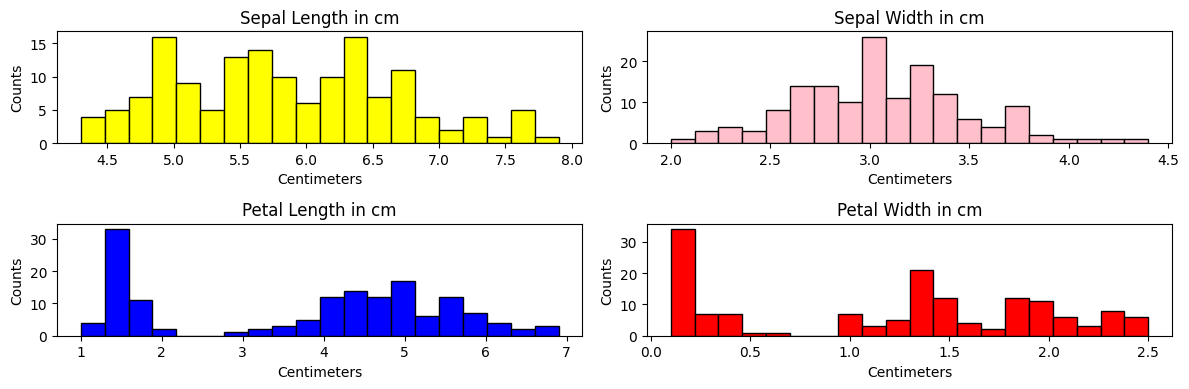

In [19]:
# for documentation on hist function, see: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
# for example of hist using iris see: https://www.geeksforgeeks.org/box-plot-and-histogram-exploration-on-iris-data/ 
# For example of plotting multiple hists on one plot see: https://www.geeksforgeeks.org/plotting-histogram-in-python-using-matplotlib/  

# Creating subplots with multiple histograms. i have 4 things to display so i'm doing a 2x2 plot.
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 4))

# these axes figures dictate where on the plot the particular subplot will appear (e.g. 0,0 = first row, first column.)
# specify your datasource, number of bins, colour of bars, and colour of outline.
axes[0,0].hist(sl, bins=20, color='Yellow', edgecolor='black')
axes[0,0].set_title('Sepal Length in cm')
 
axes[0,1].hist(sw, bins=20, color='Pink', edgecolor='black')
axes[0,1].set_title('Sepal Width in cm')

axes[1,0].hist(pl, bins=20, color='Blue', edgecolor='black')
axes[1,0].set_title('Petal Length in cm')

axes[1,1].hist(pw, bins=20, color='Red', edgecolor='black')
axes[1,1].set_title('Petal Width in cm')

# Adding labels and title. initial error iterating over each subplot individually- code adjusted by Microsoft Co-Pilot.
for ax in axes.flat:
    ax.set_xlabel('Centimeters')
    ax.set_ylabel('Counts')

# Adjusting layout for better spacing. without this all the titles start overlapping
# (see: https://matplotlib.org/stable/users/explain/axes/tight_layout_guide.html#tight-layout-guide).
plt.tight_layout()
 
# Display the figure
plt.show()

To supplement the histograms, let's confirm some of what we're seeing by calculating the modes of the data. The mode is the most common value in a dataset.

See: https://www.geeksforgeeks.org/python-statistics-mode-function/ 

In [20]:
# using the statistics library, calculate the mode for each of the four columns.
statistics.mode(sl), statistics.mode(sw), statistics.mode(pl), statistics.mode(pw)

(5.0, 3.0, 1.4, 0.2)

From the histograms and calculating the modes above we can see the most commonly occuring value for:
- Petal length is 1.5cm, with over 30 counts.
- Petal width is 0.2cm, with over 30 counts.
- Sepal length is 5.0cm with over 15 counts.
- Sepal width is 3.0cm, with close to 30 counts.

## Task 5: Investigate Relationships

Choose any two features from the data set and create a scatter plot of them.
Color-code the three different classes of the scatter plot points.

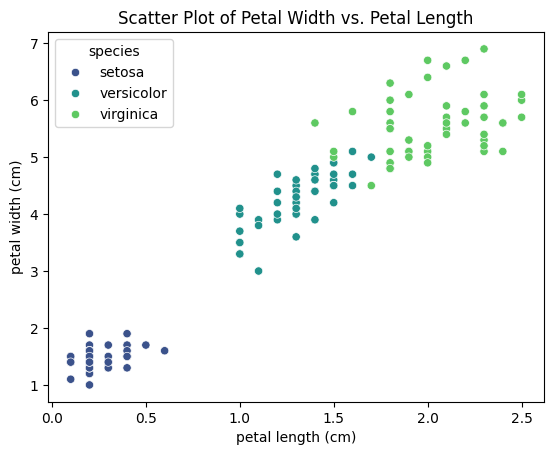

In [21]:
#  create figure and axis to plot onto
# following stucture of code in lecture and  here: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
fig, ax = plt.subplots()

# ok after struggling for ages with matplot on using the different colours, i've swapped to seaborn since that's what everyone online seems to be suggesting
# basic code followed here: https://seaborn.pydata.org/generated/seaborn.scatterplot.html and https://www.geeksforgeeks.org/plotting-graph-for-iris-dataset-using-seaborn-and-matplotlib/ 
# Hue is a grouping variable that will produce points with different colors. Can be either categorical or numeric
# palette is like colour map in matplot so i checked here to make a choice: http://matplotlib.org/stable/users/explain/colors/colormaps.html 
sns.scatterplot(data=iris_df, x='petal width (cm)', y='petal length (cm)', hue='species', palette= 'viridis') 

# create some labels for the axes
ax.set_xlabel('petal length (cm)')
ax.set_ylabel('petal width (cm)')

#add title to chart
plt.title('Scatter Plot of Petal Width vs. Petal Length')

#show the plt
plt.show()



## Task 6: Analyze Relationship

### Numpy's Polyfit according to GeeksforGeeks:

> Polynomial fitting is a form of regression analysis where the relationship between the independent variable xand the dependent variable y is modeled as an n-degree polynomial. The goal is to find the polynomial coefficients that minimize the difference between the observed data points and the values predicted by the polynomial.
>
> https://www.geeksforgeeks.org/numpys-polyfit-function-a-comprehensive-guide/ 

Linear Fit Coefficients: [ 0.41575542 -0.36307552]


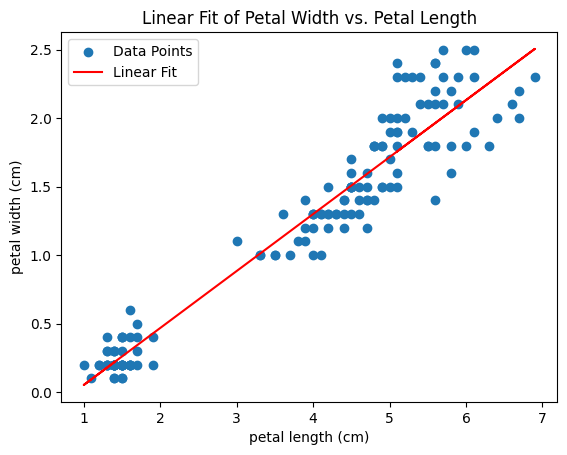

In [22]:
# just testing out how to plot - using g4g code to see how to do this with iris, will come back later and tailor it more to what i personally want to explore.
x = iris_df['petal length (cm)']
y = iris_df['petal width (cm)']

# Perform linear fit. plot x against y and specify the degree. if i understand correctly, i'm choosing a first degree polynomial because im intending to plot a straight line
# See: https://www.themathpage.com/aPreCalc/equation-of-a-line.htm 
coefficients = np.polyfit(x, y, 1)
print("Linear Fit Coefficients:", coefficients)

# Create polynomial function
p = np.poly1d(coefficients)

#plot this on a scatter plot, add labels of the data points, then plot the linear fit line and add a label for that too.
plt.scatter(x, y, label='Data Points')
plt.plot(x, p(x), label='Linear Fit', color='red')
# create some labels for the axes
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.title('Linear Fit of Petal Width vs. Petal Length')

plt.legend()
plt.show()

## Task 7: Analyze Class Distributions

Next, we will look at boxplots. Boxplots are useful visualizations for comparing sets of data and investigating the distributions of those datasets. 


See: https://www.ncl.ac.uk/webtemplate/ask-assets/external/maths-resources/statistics/data-presentation/box-and-whisker-plots.html#:~:text=Definition,it%20also%20shows%20any%20outliers. 

In [23]:
# to make a boxplot in matplot you have to drop any non-numerical data. my data set has species. lets drop that for a boxplot friendly version of the df.
# see: https://www.nickmccullum.com/python-visualization/boxplot/ 
iris_boxplot = iris_df.drop(columns=['species'])

Text(0.5, 1.0, 'Side-by-Side Boxplots of Iris Features')

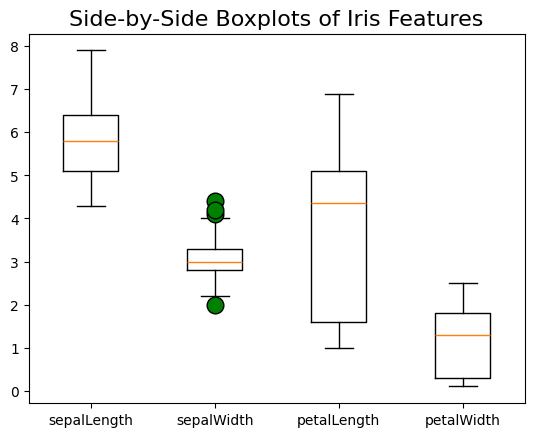

In [24]:
# Create figure, axis.
fig, ax = plt.subplots()

# before passing the data to the box plot function, i'm going to create flierprops as noted here: https://matplotlib.org/3.1.3/gallery/statistics/boxplot.html 
flierprops = dict(marker='o', markerfacecolor='green', markersize=12, linestyle='none')

# Create boxplot. https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html 
ax.boxplot(iris_boxplot, flierprops=flierprops)

# # Set names of x-axis ticks.
# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xticks.html
ax.set_xticks([1, 2, 3, 4], ["sepalLength", "sepalWidth", "petalLength", "petalWidth"], fontsize=10)
ax.set_title("Side-by-Side Boxplots of Iris Features", fontsize=16)

The boxplot above illustrates a few characteristics of the data. For example:
- Of all four columns, only sepal width has values that would be considered outliers. These are indicated by the green dots. The narrow boxplot element indicates low variablilty in values which are clustered around the median.
- Petal length has the greatest variability. The long top whisker indicates some positive skew. 
- Petal width has less variablility and is mildly positively skewed but appears close to normal.

Text(0.5, 1.0, 'Compare the Distributions of Sepal Length')

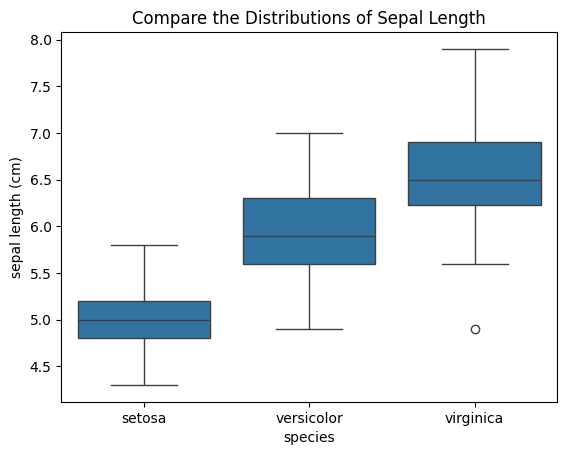

In [25]:
# that was a helpful overview of the data but i also want to check the individual class types and their distribution. I think it's quicker to use seaborn
# see: https://seaborn.pydata.org/generated/seaborn.boxplot.html

# how to set the title: https://how.dev/answers/how-to-add-a-title-to-a-seaborn-plot 
# im putting the different species across the x axis and using the sepal length column to plot my y. this is should give me the sepal length for all of the classes if my dataset is working how i want it to.
sns.boxplot(x="species", y="sepal length (cm)", data=iris_df).set_title("Compare the Distributions of Sepal Length")

Text(0.5, 1.0, 'Compare the Distributions of Sepal Width')

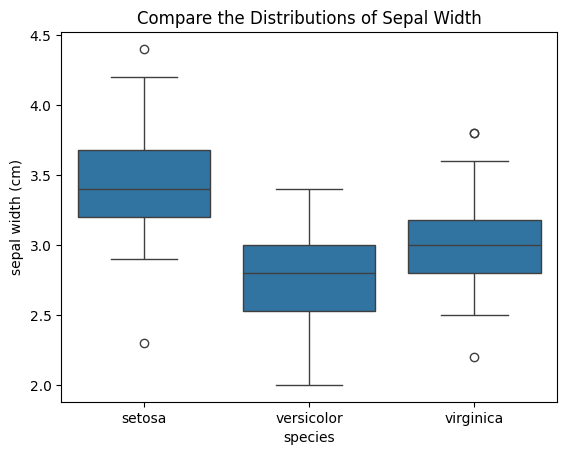

In [26]:
# repeat for other features
sns.boxplot(x="species", y="sepal width (cm)", data=iris_df).set_title("Compare the Distributions of Sepal Width")

Text(0.5, 1.0, 'Compare the Distributions of Petal Width')

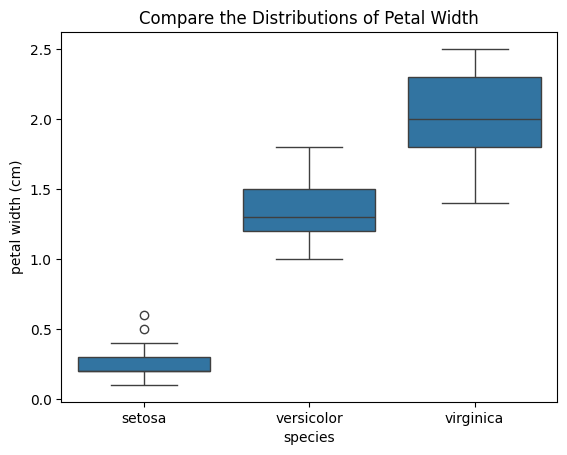

In [27]:
## repeat for other features
sns.boxplot(x="species", y="petal width (cm)", data=iris_df).set_title("Compare the Distributions of Petal Width")

Text(0.5, 1.0, 'Compare the Distributions of Petal Length')

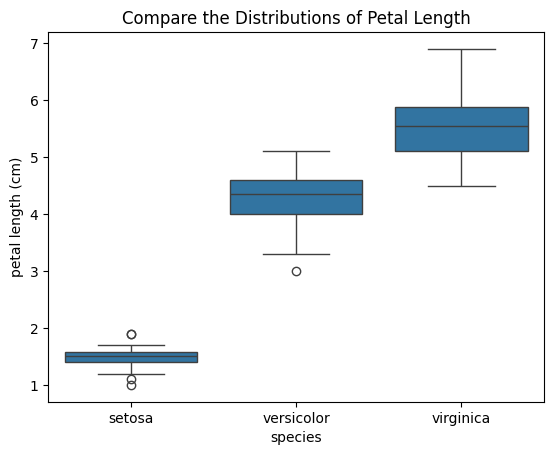

In [28]:
# repeat for other features
sns.boxplot(x="species", y="petal length (cm)", data=iris_df).set_title("Compare the Distributions of Petal Length")

From the individual boxplots above, we learn the following:
- Iris setosa has the least variation and smallest values for most features (sepal length, petal length and width). It has particularly low variation where its petal data is concerned.
- For each feature, Iris virginia appears to have the largest measurements except for sepal width.
- The versicolour class falls in between the other two in terms of size of its features.
- The data above shows a fairly consistent pattern except for our sepal width feature.

## Task 8: Compute Correlations

In [29]:
# we can use pandas correlation function to examine the relationship between each of the dataset's variables.
# see the following on how to structure the code: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html#pandas-dataframe-corr 
# When you don't specify parameters, this method defaults to Pearson correlation which is appropriate when using continuous and normally distributed data.
# see for more detail: https://docs.vultr.com/python/third-party/pandas/DataFrame/corr 
# you can only do the correlation on numeric data so i'll use the boxplot dataset i prepared before.
iris_boxplot.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


Pearson's correlation shows the direction and strength of a relationship between two variables. The correlation above shows the following:
- Strong positive relationship between sepal length and petal length
- Strong positive relationship between sepal length and petal width
- Strong positive relationship between petal length and petal width
- Moderate negative relationship between sepal width and petal length.

For more details on interpretting the output from Pearson's correlation see: https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/pearsons-correlation-coefficient/#:~:text=High%20Degree%3A%20Values%20between%20%C2%B1,of%20zero%20implies%20no%20relationship. 


The relationships above can also be visualised using a heatmap.

<Axes: >

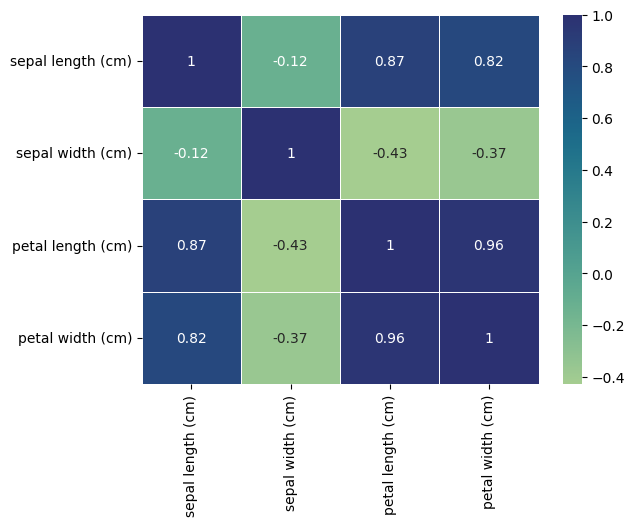

In [30]:
# use seaborn's heatmap function. See: https://seaborn.pydata.org/generated/seaborn.heatmap.html 
# cmap is optional parameter indicating how you want values to map to colour values.
# annot is an optional parameter determining if you want the heatmap annotated, and in this case i do.
# i've also added lines between cells to make it a bit more readable and less of a solid block of colour. 
# you can do loads as seen here: https://python-graph-gallery.com/92-control-color-in-seaborn-heatmaps/ 
sns.heatmap(iris_boxplot.corr(),cmap="crest", annot=True, linewidth=.5)

## Task 9: Fit a Simple Linear Regression

In [31]:
# https://realpython.com/linear-regression-in-python/#simple-linear-regression-with-scikit-learn 
# one point above states linearregression() requires x to be a 2D array. 
# i initially got errors because this wasn't the case. the reshape(-1,1) below basically changes the x values from being a 1D array with 150 instances to a 2D array with 150 rows and 1 column.
# to use numpy reshape on a pandas df you have to use values as well which i learned from: https://stackoverflow.com/questions/14390224/how-to-reshape-a-pandas-series#:~:text=you%20can%20directly%20use%20a,convert%20DataFrame%20to%20numpy%20ndarray 

# set out the data I'll input to the regression function
x = iris_df["petal length (cm)"].values.reshape((-1, 1))
y = iris_df["petal width (cm)"]

In [32]:
# create a model that fits x points and y points using linear regression
# after errors i realise i had to reshape 
model = LinearRegression().fit(x, y)

In [33]:
# get the r squared score from the model
r_sq = model.score(x, y)
# print the result
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.9271098389904927


In [34]:
# round my r square value for the next task
r_sq = round(r_sq,2)

Linear Fit Coefficients: [ 0.41575542 -0.36307552]


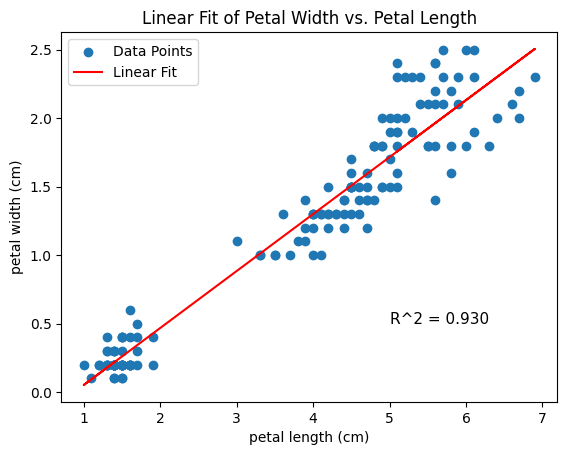

In [35]:
x = iris_df['petal length (cm)']
y = iris_df['petal width (cm)']

# Perform linear fit
coefficients = np.polyfit(x, y, 1)
print("Linear Fit Coefficients:", coefficients)

# Create polynomial function
p = np.poly1d(coefficients)

#plot this on a scatter plot, add labels of the data points, then plot the linear fit line.
plt.scatter(x, y, label='Data Points')
plt.plot(x, p(x), label='Linear Fit', color='red')
# instead of messing with the axis im trying to annotate inside the plot
# im adapting code from here but using python plain text formatting: https://matplotlib.org/stable/users/explain/text/annotations.html#basic-annotation 
# the xy argument dictates placement
plt.annotate(f'R^2 = {r_sq:.3f}', xy=(5, 0.5),fontsize=11, color='black')
# create some labels for the axes
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.title('Linear Fit of Petal Width vs. Petal Length')

plt.legend()
plt.show()

## Task 10: Too Many Features

Seaborn's pairplot allows us to visualise and explore our full data set in one quick plot. Each square shows how the variable specified on the x axis relates to the corresponding variable on the y axis. In my code below I've added the extra element of including hue which I explained earlier is similar to a grouping variable in seaborn plotting. 

In [36]:
# set the styling of the figure. see: https://seaborn.pydata.org/generated/seaborn.set_style.html#seaborn-set-style 
sns.set_style('darkgrid')

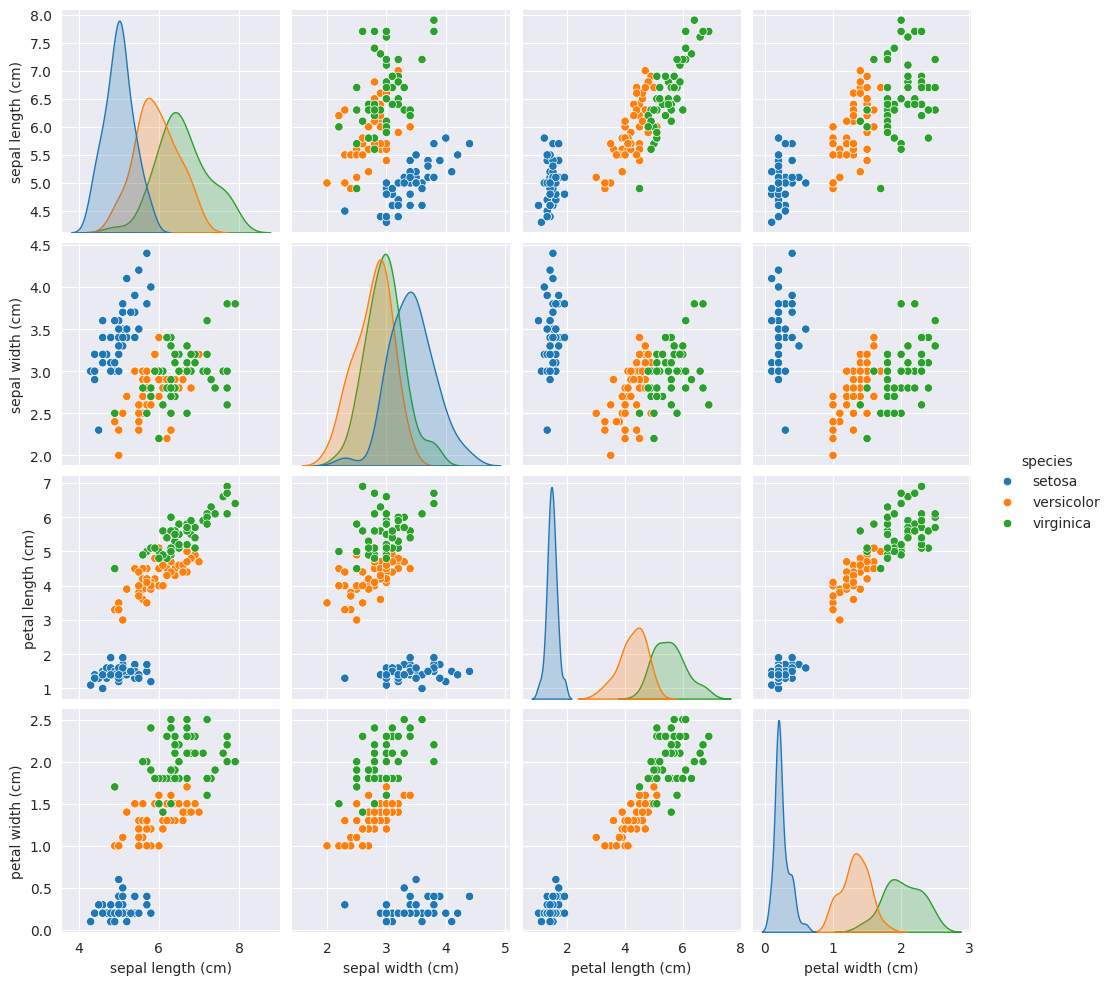

In [37]:
# see: https://seaborn.pydata.org/generated/seaborn.pairplot.html 
sns.pairplot(iris_df, hue="species")

## END